# デモデータ作成用 ノート

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
from sklearn import datasets

In [5]:
sns.set()

## 少し大きなサイズのデータ作成

データ作成

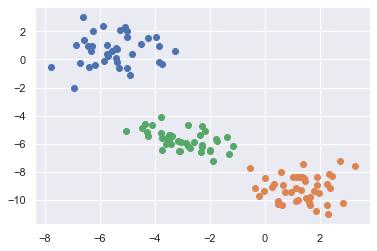

In [16]:
n = 150
varied = datasets.make_blobs(n_samples=n, cluster_std=[1.0, 1.0, 1.0], random_state=16)

pd.DataFrame(varied[0]).to_csv("data_blobs.csv", header=None, index=False)

ind = np.arange(0, n)

d_ind = np.sort(np.random.choice(ind, int(n * 0.8), replace=False))
e_ind = np.sort(np.array(list(set(np.arange(0, n)) - set(d_ind))))

data = varied[0][d_ind]
d_label = varied[1][d_ind]

esti = varied[0][e_ind]

plt.plot(data[:, 0][d_label == 0], data[:, 1][d_label == 0], 'o')
plt.plot(data[:, 0][d_label == 1], data[:, 1][d_label == 1], 'o')
plt.plot(data[:, 0][d_label == 2], data[:, 1][d_label == 2], 'o')
# plt.tick_params(bottom=False, left=False, right=False, top=False, labelbottom=False, labelleft=False, labelright=False, labeltop=False)
# plt.savefig("demo_artificial.svg", pad_inches=0, bbox_inches='tight')
plt.show()

クラスタリング

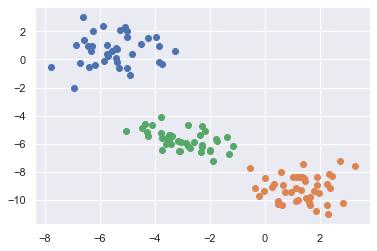

In [17]:
Z = linkage(data, method='ward')

cresult = fcluster(Z, 3, criterion='maxclust')

plt.plot(data[:, 0][cresult == 1], data[:, 1][cresult == 1], 'o')
plt.plot(data[:, 0][cresult == 2], data[:, 1][cresult == 2], 'o')
plt.plot(data[:, 0][cresult == 3], data[:, 1][cresult == 3], 'o')
plt.show()

保存

In [ ]:
pd.DataFrame(data).to_csv("demo_blobs.csv", header=None, index=False)

sigma = pd.read_csv("Sigma.csv", header=None)

data = pd.read_csv("data.csv", header=None)

## 簡単なデモデータ作成

データ作成

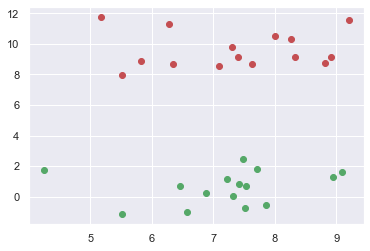

In [19]:
n = 45
varied = datasets.make_blobs(n_samples=n, cluster_std=[1.0, 1.0, 1.0], random_state=8)
data = varied[0]
label = varied[1]

plt.plot(data[:, 0][label==0], data[:, 1][label==0], 'ro')
plt.plot(data[:, 0][label==1], data[:, 1][label==1], 'go')
# plt.plot(data[:, 0][label==2], data[:, 1][label==2], 'bo')
plt.show()

前処理

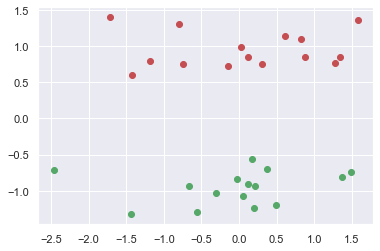

In [20]:
demo = np.r_[data[label==0], data[label==1]]

demo_label= np.r_[label[label==0], label[label==1]]

demo = pd.DataFrame(demo)

demo = (demo - demo.mean()) / demo.std()

plt.plot(demo.iloc[:, 0][demo_label==0], demo.iloc[:, 1][demo_label==0], 'ro')
plt.plot(demo.iloc[:, 0][demo_label==1], demo.iloc[:, 1][demo_label==1], 'go')
# plt.savefig("../../demo_data.svg", pad_inches=0, bbox_inches='tight')
plt.show()

データ保存

In [112]:
demo.to_csv("demo_data.csv", header=None, index=False)

sigma = pd.DataFrame(np.identity(demo.shape[0]))

sigma.to_csv("../../each_dim/data/demo_Sigma.csv", header=None, index=False)

$\xi^2$の保存 (PHCI-cluster用)

In [ ]:
xi = pd.DataFrame([1.0])

xi.to_csv("demo_xi.csv", header=None, index=False)

$\Xi$の保存 (PHCI-feature用)

In [17]:
print(demo.cov())

Xi = demo.cov()

Xi.to_csv("../../each_dim/data/demo_Xi.csv", header=None, index=False)